In [156]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [157]:
y=pd.read_csv(r'C:\\Quarter 1\\6020 Predictive analysis\\Module 4 Decision Trees\\Nashville_housing_data_2013_2016.csv')

In [158]:
df = y[['Land Use', 'Sale Price', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Acreage', 'Tax District', 'Land Value', 'Building Value', 'Total Value', 'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath']]
df = df.loc[~(df['Acreage'].isna())]
df = df.loc[~(df['Finished Area'].isna())]
df = df.loc[~(df['Foundation Type'].isna())]
df = df.loc[~(df['Bedrooms'].isna())]
df = df.loc[~(df['Full Bath'].isna())]
df = df.loc[~(df['Half Bath'].isna())]

In [159]:
df['Pricing'] = np.where(df['Total Value']<df['Sale Price'] , 1, 0)
df = df.drop(columns=['Total Value','Sale Price'])

In [160]:
df['Sold As Vacant']=df_l['Sold As Vacant'].replace(to_replace=['No', 'Yes'], value=[0, 1])
df['Multiple Parcels Involved in Sale']=df['Multiple Parcels Involved in Sale'].replace({'No': 0, 'Yes': 1})
df = pd.get_dummies(df, columns=['Land Use', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade'], drop_first=False, dummy_na=False)

In [161]:
df

,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,...,Grade_OFB,Grade_OFC,Grade_OMB,Grade_SRC,Grade_SRD,Grade_SSC,Grade_TAC,Grade_TCC,Grade_TFC,Grade_X
1,0,0,0.17,32000.0,134400.0,1149.00000,1941.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.11,34000.0,157800.0,2090.82495,2000.0,3.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.17,25000.0,243700.0,2145.60001,1948.0,4.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.34,25000.0,138100.0,1969.00000,1910.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0.17,25000.0,86100.0,1037.00000,1945.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,0,0,0.27,25000.0,142400.0,2421.00000,1996.0,3.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
56607,0,0,0.23,25000.0,159300.0,3117.00000,1995.0,3.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
56614,0,0,0.15,40000.0,204100.0,1637.00000,2004.0,3.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
56615,0,0,0.19,40000.0,295900.0,2478.00000,2005.0,4.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [162]:
y_logr=df[['Pricing']]
x_logr=df.drop(['Pricing'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

In [164]:
import statsmodels.api as sm
import time

 
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.5):
    # https://stackoverflow.com/a/39813304/1956309
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# min_variance = .9 * (1 - .9)  # You can play here with different values.
min_variance = 0.002
low_variance = variance_threshold_selector(x_train, min_variance) 
X = low_variance
Xlog2 = sm.add_constant(X)
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

time taken:  0.07708907127380371
Optimization terminated successfully.
         Current function value: 0.540914
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Pricing   No. Observations:                19210
Model:                          Logit   Df Residuals:                    19170
Method:                           MLE   Df Model:                           39
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                 0.05613
Time:                        15:29:05   Log-Likelihood:                -10391.
converged:                       True   LL-Null:                       -11009.
Covariance Type:            nonrobust   LLR p-value:                7.287e-234
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const              

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

begin = time.time()
logreg = LogisticRegression()
logreg.fit(x_train,z_train)
end=time.time()
print("time taken: ",end-begin)


z_pred=logreg.predict(x_test)
cnf_matrix = confusion_matrix(z_test, z_pred)
print(cnf_matrix)
classification_report=classification_report(z_test, z_pred)
print(classification_report)

time taken:  0.2117304801940918
[[  36 1198]
 [  34 3535]]
              precision    recall  f1-score   support

           0       0.51      0.03      0.06      1234
           1       0.75      0.99      0.85      3569

    accuracy                           0.74      4803
   macro avg       0.63      0.51      0.45      4803
weighted avg       0.69      0.74      0.65      4803



In [155]:
logreg.score(x_test, z_test)

0.7455756818655007

In [105]:
df

,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,...,Grade_OFB,Grade_OFC,Grade_OMB,Grade_SRC,Grade_SRD,Grade_SSC,Grade_TAC,Grade_TCC,Grade_TFC,Grade_X
1,0,0,0.17,32000.0,134400.0,1149.00000,1941.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.11,34000.0,157800.0,2090.82495,2000.0,3.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.17,25000.0,243700.0,2145.60001,1948.0,4.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0.34,25000.0,138100.0,1969.00000,1910.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0.17,25000.0,86100.0,1037.00000,1945.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,0,0,0.27,25000.0,142400.0,2421.00000,1996.0,3.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
56607,0,0,0.23,25000.0,159300.0,3117.00000,1995.0,3.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
56614,0,0,0.15,40000.0,204100.0,1637.00000,2004.0,3.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
56615,0,0,0.19,40000.0,295900.0,2478.00000,2005.0,4.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
z=df[['Pricing']]
df['Pricing'] = z['Pricing'].astype('string')
df = df.drop(columns=['Pricing'])
#Split Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, Z_train, Z_test = train_test_split(df, z, test_size=0.20)

# Decision Trees

In [169]:
from sklearn.tree import DecisionTreeClassifier
begin = time.time()
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42,max_depth=4, min_samples_leaf=5)   
dt_model.fit(X_train,Z_train)
end=time.time()
print("time taken: ",end-begin)

time taken:  0.12398695945739746


In [170]:
Z_predict = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Z_test,Z_predict)

0.7676452217364147

In [171]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Z_test, Z_predict))
print(classification_report(Z_test, Z_predict))

[[ 113 1091]
 [  25 3574]]
              precision    recall  f1-score   support

           0       0.82      0.09      0.17      1204
           1       0.77      0.99      0.86      3599

    accuracy                           0.77      4803
   macro avg       0.79      0.54      0.52      4803
weighted avg       0.78      0.77      0.69      4803



Text(0, 0.5, 'FEATURE NAMES')

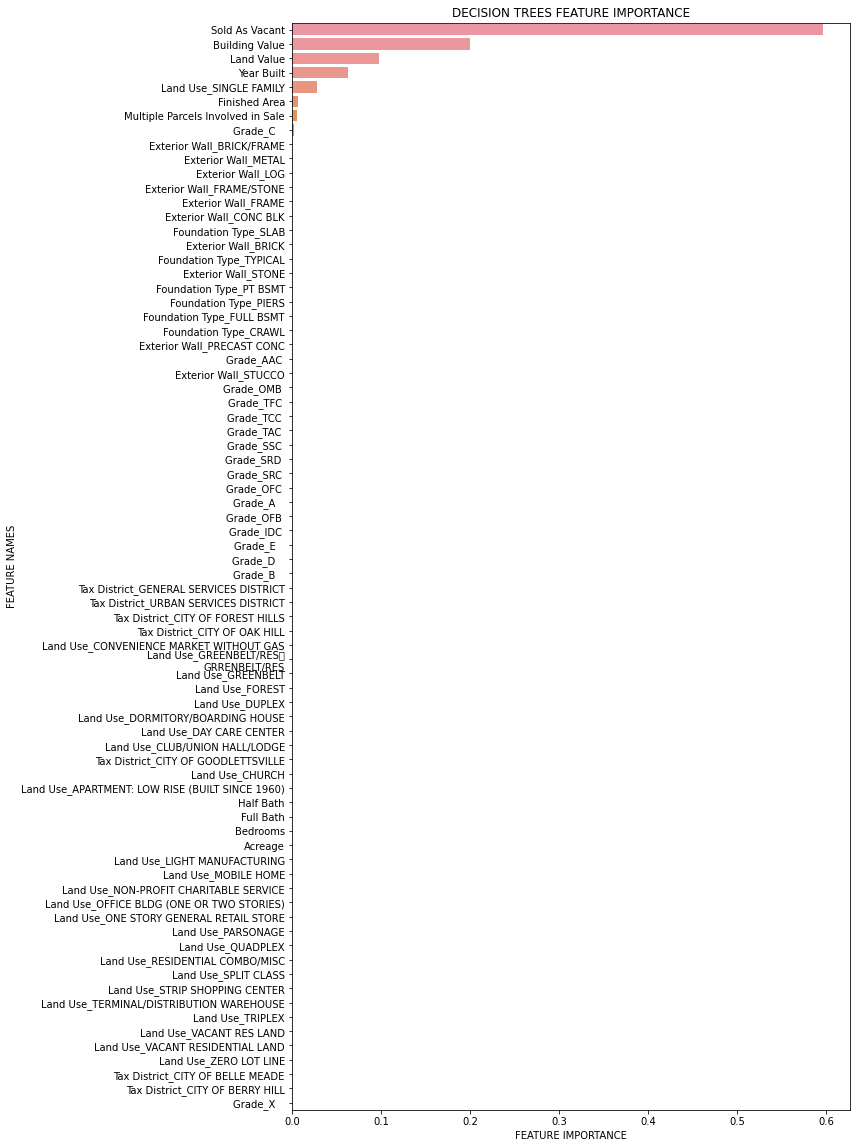

In [154]:
#Feature Importance
importances = dt_model.feature_importances_

feature_importance = np.array(importances)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,20))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('DECISION TREES ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

# Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
begin = time.time()
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(X_train,Z_train)
end=time.time()
print("time taken: ",end-begin)

time taken:  1.0029008388519287


In [177]:
#Accuracy

zrf_predict = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zrf_predict)

0.7670206121174266

In [178]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, zrf_predict))
print(classification_report(z_test, zrf_predict))

[[ 123 1111]
 [   8 3561]]
              precision    recall  f1-score   support

           0       0.94      0.10      0.18      1234
           1       0.76      1.00      0.86      3569

    accuracy                           0.77      4803
   macro avg       0.85      0.55      0.52      4803
weighted avg       0.81      0.77      0.69      4803



Text(0, 0.5, 'FEATURE NAMES')

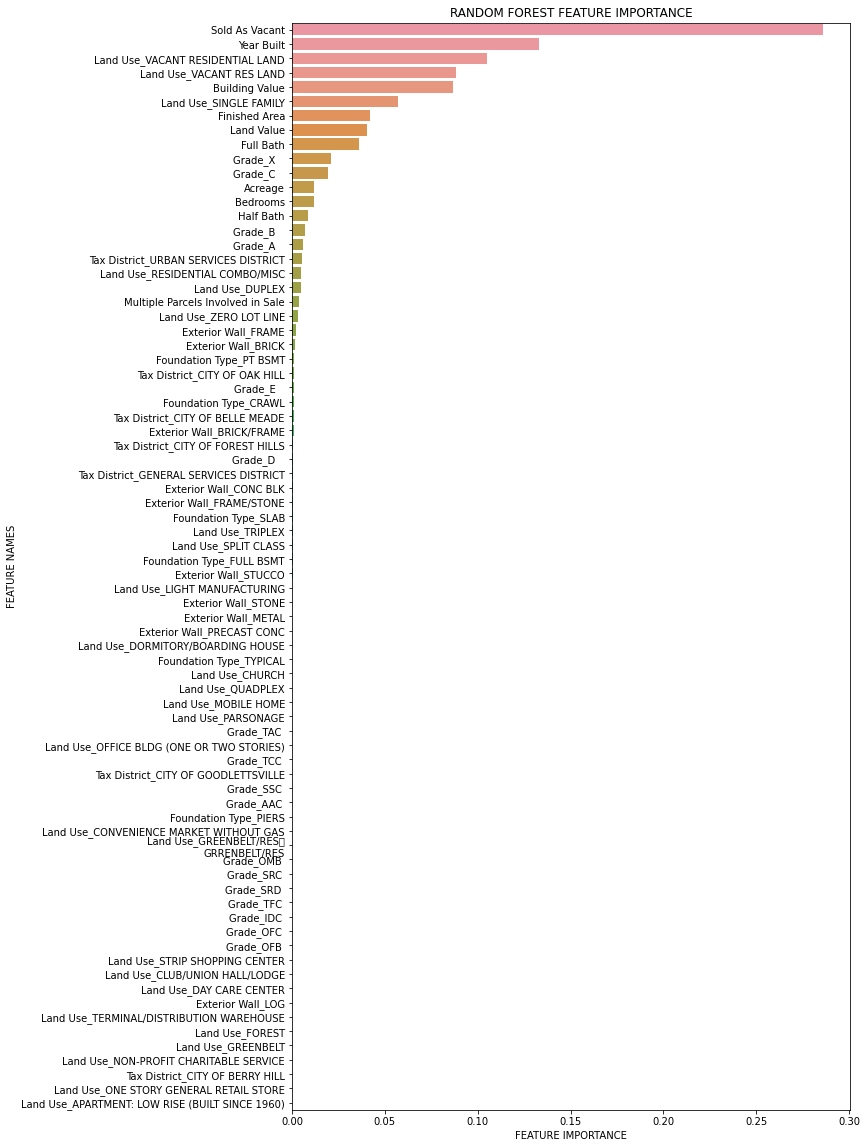

In [179]:
#Feature Importance
importances = rf_model.feature_importances_

feature_importance = np.array(importances)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,20))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('RANDOM FOREST ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [182]:
begin = time.time()
rf_model1 = RandomForestClassifier(random_state=42,max_depth=4,n_estimators=1000)   
rf_model1.fit(X_train,Z_train)
end=time.time()
print("time taken: ",end-begin)

zrf_predict1 = rf_model1.predict(x_test)
accuracy_score(z_test,zrf_predict1)

time taken:  10.118160486221313


0.7668124089110973

Text(0, 0.5, 'FEATURE NAMES')

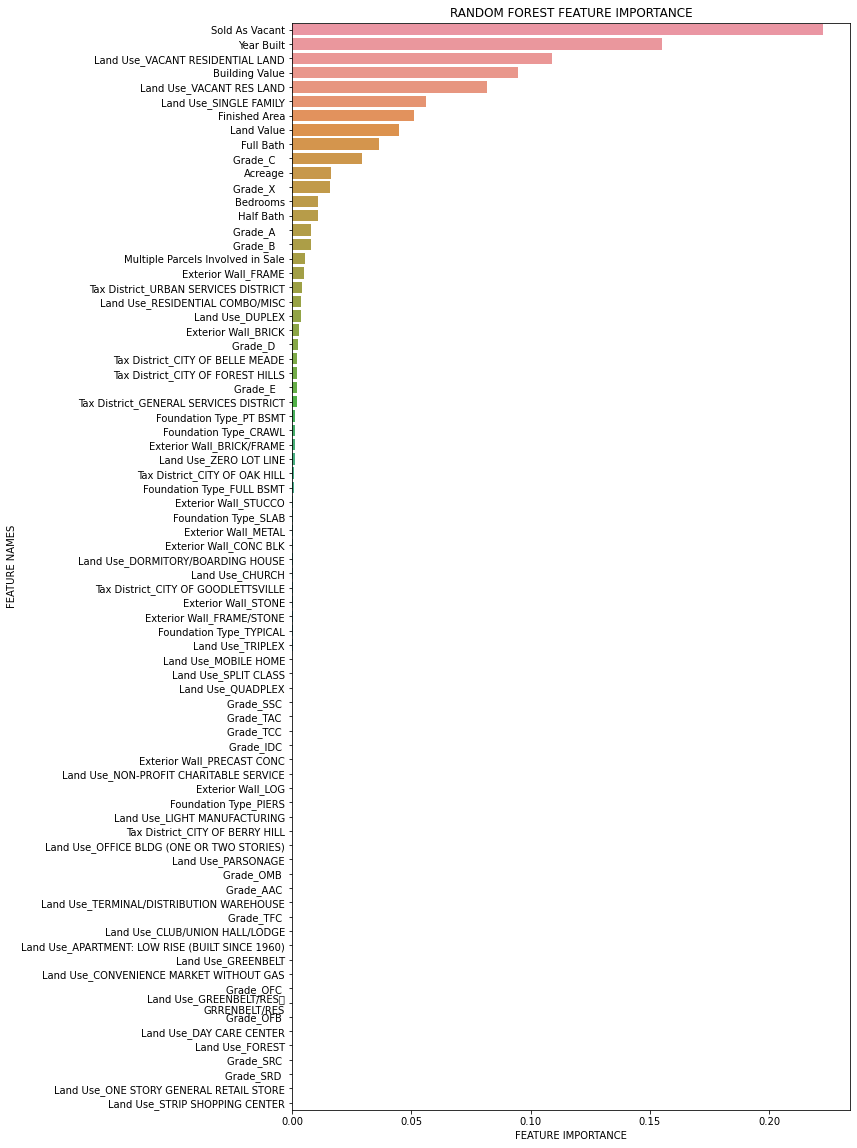

In [184]:
#Feature Importance
importances = rf_model1.feature_importances_

feature_importance = np.array(importances)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,20))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('RANDOM FOREST ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [183]:
print(confusion_matrix(z_test, zrf_predict1))
print(classification_report(z_test, zrf_predict1))

[[ 123 1111]
 [   9 3560]]
              precision    recall  f1-score   support

           0       0.93      0.10      0.18      1234
           1       0.76      1.00      0.86      3569

    accuracy                           0.77      4803
   macro avg       0.85      0.55      0.52      4803
weighted avg       0.81      0.77      0.69      4803



# Gradient Boosting

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
begin = time.time()
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(X_train,Z_train)
end=time.time()
print("time taken: ",end-begin)

time taken:  7.784522533416748


In [120]:
#Accuracy

zgb_predict = gb_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zgb_predict)

0.7793046012908599

In [121]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, zgb_predict))
print(classification_report(z_test, zgb_predict))

[[ 186 1035]
 [  25 3557]]
              precision    recall  f1-score   support

           0       0.88      0.15      0.26      1221
           1       0.77      0.99      0.87      3582

    accuracy                           0.78      4803
   macro avg       0.83      0.57      0.57      4803
weighted avg       0.80      0.78      0.72      4803

